<a href="https://colab.research.google.com/github/DasSagor/Machine-Learning/blob/main/Module_03_Scaling%2C_Encoding%2C_and_Distances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Standardization (z-score)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.DataFrame({'h': [150,140,278,185,190],
                   'w': [50,40,76,80,90]})

df

,h,w
0,150,50
1,140,40
2,278,76
3,185,80
4,190,90


In [ ]:
mean = df.mean()

# print(mean)

std = df.std()

print(std)

z = (df-mean)/std

z.round(2)

h    54.449977
w    21.194339
dtype: float64


,h,w
0,-0.71,-0.81
1,-0.89,-1.28
2,1.64,0.42
3,-0.07,0.60
4,0.03,1.08


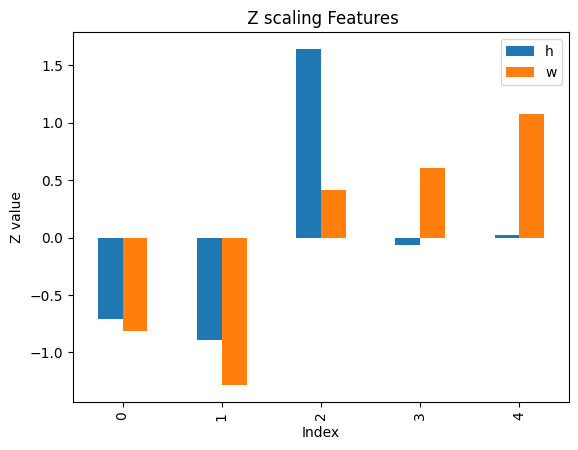

In [ ]:
z.plot(kind='bar')

plt.title(' Z scaling Features')

plt.xlabel('Index')
plt.ylabel('Z value')

plt.show()

### Min-Max Scaling

In [ ]:
df = pd.DataFrame({'h': [150,140,278,185,190],
                   'w': [50,40,76,80,90]})

In [ ]:
# step-1: Min, Max, Range

mn = df.min()
mx = df.max()
rg = mx - mn

mn, mx, rg

(h    140
 w     40
 dtype: int64,
 h    278
 w     90
 dtype: int64,
 h    138
 w     50
 dtype: int64)

In [ ]:
# Step-2: Shift to Zero

ss = df - mn
ss

,h,w
0,10,10
1,0,0
2,138,36
3,45,40
4,50,50


In [ ]:
# Step-2: Divide by range

mm = ss/rg
mm.round(2)

,h,w
0,0.07,0.20
1,0.00,0.00
2,1.00,0.72
3,0.33,0.80
4,0.36,1.00


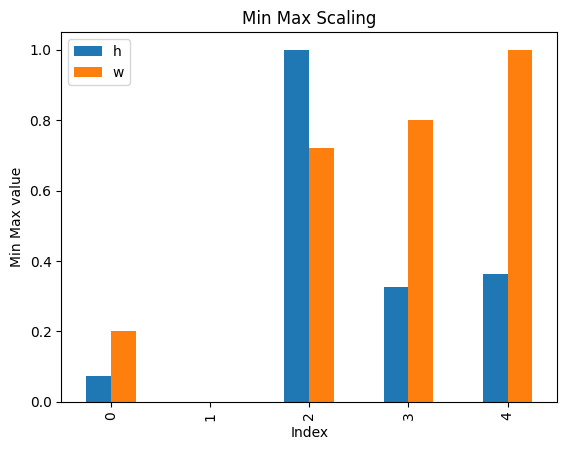

In [ ]:
mm.plot(kind='bar')

plt.title('Min Max Scaling')

plt.xlabel('Index')
plt.ylabel('Min Max value')

plt.show()

### Robust Scaling (Outlier-Resistant)

In [ ]:
df = pd.DataFrame({'h': [150,140,278,185,190],
                   'w': [50,40,76,80,90]})

In [ ]:
# Step-1: median, quartiles, IQR

md = df.median()
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3-q1

md, q1, q3, iqr

(h    185.0
 w     76.0
 dtype: float64,
 h    150.0
 w     50.0
 Name: 0.25, dtype: float64,
 h    190.0
 w     80.0
 Name: 0.75, dtype: float64,
 h    40.0
 w    30.0
 dtype: float64)

In [ ]:
# Step-2: center by median

ct = df - md
ct

,h,w
0,-35.0,-26.0
1,-45.0,-36.0
2,93.0,0.0
3,0.0,4.0
4,5.0,14.0


In [ ]:
# Step-3: divide by IQR
rb = ct/iqr

rb.round(2)


,h,w
0,-0.88,-0.87
1,-1.12,-1.20
2,2.33,0.00
3,0.00,0.13
4,0.12,0.47


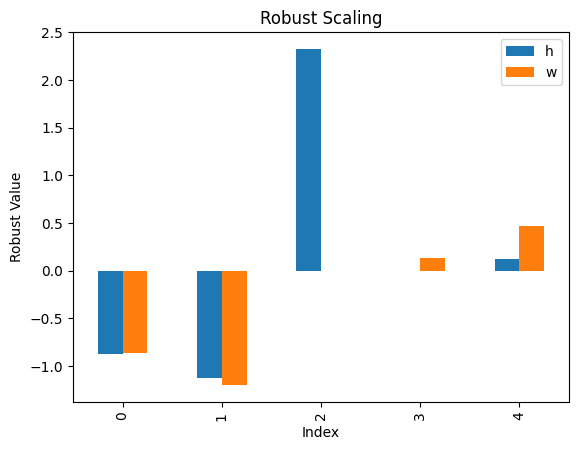

In [ ]:
rb.plot(kind='bar')

plt.title('Robust Scaling')

plt.xlabel('Index')
plt.ylabel('Robust Value')

plt.show()

In [ ]:
out = pd.concat([df,
                 z.add_prefix('z_'),
                 mm.add_prefix('mm_'),
                 rb.add_prefix('rb_')], axis=1)

out.round(2)

,h,w,z_h,z_w,mm_h,mm_w,rb_h,rb_w
0,150,50,-0.71,-0.81,0.07,0.20,-0.88,-0.87
1,140,40,-0.89,-1.28,0.00,0.00,-1.12,-1.20
2,278,76,1.64,0.42,1.00,0.72,2.33,0.00
3,185,80,-0.07,0.60,0.33,0.80,0.00,0.13
4,190,90,0.03,1.08,0.36,1.00,0.12,0.47


### One-Hot Encoding

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'id': [1,2,3,4],
    'color':['red','blue','green','red'],
    'size':['Small','Medium','Large','Medium'],
    'prize':[10,12,15,11]
})

df

,id,color,size,prize
0,1,red,Small,10
1,2,blue,Medium,12
2,3,green,Large,15
3,4,red,Medium,11


In [ ]:
# Step 2: Apply one-hot encoding to the 'color' column

d_color = pd.get_dummies(df['color'],prefix='color',dtype=int)


,color_blue,color_green,color_red
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1


In [ ]:
# Step 3: Combine the new columns back with the original data
df_encoded = pd.concat([df,d_color],axis=1)

print(df_encoded)

   id  color    size  prize  color_blue  color_green  color_red
0   1    red   Small     10           0            0          1
1   2   blue  Medium     12           1            0          0
2   3  green   Large     15           0            1          0
3   4    red  Medium     11           0            0          1
